<a href="https://colab.research.google.com/github/AnIsAsPe/ClasificadorClientesTelecom/blob/master/Notebooks/Churn_Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El conjunto de Datos fue obtenido de Kaggle [Telecom Churn Dataset](https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets?datasetId=255093&sortBy=voteCount&select=churn-bigml-80.csv)


# Bibliotecas

In [13]:
!pip install dtreeviz  # versión 2.2.2

In [14]:
import numpy as np
import pandas as pd

# Funciones específicas de Sckit-learn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc

# Para visualizar el árbol de decisión
import graphviz
import dtreeviz

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Funciones

In [15]:
def describe_datos(df):
    unicos =[]
    for col in df:
        unicos.append(df[col].unique())
    unicos = pd.Series(unicos, index=df.columns)
    descripcion = pd.concat([df.dtypes, df.isna().sum(),df.nunique(),unicos], axis=1)
    descripcion.columns = ['dtypes', 'null','nunique','unique' ]
    return(descripcion)

# 1. Lectura de datos y breve exploración

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/ClasificadorClientesTelecom/master/Datos/churn_telecom_espa%C3%B1ol.csv')
print(df.shape)
df.head(3)

(3333, 20)


,Estado,Dias de antiguedad,Codigo Postal,Plan Internacional,Plan Correo de voz,Total Correos de Voz,Minutos Dia,Llamadas Dia,Cargos Dia,Minutos Tarde,Llamadas Tarde,Cargos Tarde,Minutos Noche,Llamadas Noche,Cargos Noche,Minutos Internacional,Llamadas Internacional,Cargos Internacional,Llamadas Servicio al Cliente,Abandono
0,KS,128,415,No,Si,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Si,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Estado                        3333 non-null   object 
 1   Dias de antiguedad            3333 non-null   int64  
 2   Codigo Postal                 3333 non-null   int64  
 3   Plan Internacional            3333 non-null   object 
 4   Plan Correo de voz            3333 non-null   object 
 5   Total Correos de Voz          3333 non-null   int64  
 6   Minutos Dia                   3333 non-null   float64
 7   Llamadas Dia                  3333 non-null   int64  
 8   Cargos Dia                    3333 non-null   float64
 9   Minutos Tarde                 3333 non-null   float64
 10  Llamadas Tarde                3333 non-null   int64  
 11  Cargos Tarde                  3333 non-null   float64
 12  Minutos Noche                 3333 non-null   float64
 13  Lla

In [18]:
describe_datos(df)

,dtypes,null,nunique,unique
Estado,object,0,51,"[KS, OH, NJ, OK, AL, MA, MO, WV, RI, IA, MT, I..."
Dias de antiguedad,int64,0,212,"[128, 107, 137, 84, 75, 118, 121, 147, 141, 74..."
Codigo Postal,int64,0,3,"[415, 408, 510]"
Plan Internacional,object,0,2,"[No, Si]"
Plan Correo de voz,object,0,2,"[Si, No]"
Total Correos de Voz,int64,0,46,"[25, 26, 0, 24, 37, 27, 33, 39, 41, 28, 30, 34..."
Minutos Dia,float64,0,1667,"[265.1, 161.6, 243.4, 299.4, 166.7, 223.4, 218..."
Llamadas Dia,int64,0,119,"[110, 123, 114, 71, 113, 98, 88, 79, 84, 127, ..."
Cargos Dia,float64,0,1667,"[45.07, 27.47, 41.38, 50.9, 28.34, 37.98, 37.0..."
Minutos Tarde,float64,0,1611,"[197.4, 195.5, 121.2, 61.9, 148.3, 220.6, 348...."


In [19]:
df['Codigo Postal'] = df['Codigo Postal'].astype('object')
df['Abandono'] = df['Abandono'].astype(int)

In [20]:
df['Abandono'].value_counts(normalize=True)

,proportion
Abandono,
0,0.855086
1,0.144914


In [21]:
df.select_dtypes('number').columns

Index(['Dias de antiguedad', 'Total Correos de Voz', 'Minutos Dia',
       'Llamadas Dia', 'Cargos Dia', 'Minutos Tarde', 'Llamadas Tarde',
       'Cargos Tarde', 'Minutos Noche', 'Llamadas Noche', 'Cargos Noche',
       'Minutos Internacional', 'Llamadas Internacional',
       'Cargos Internacional', 'Llamadas Servicio al Cliente', 'Abandono'],
      dtype='object')

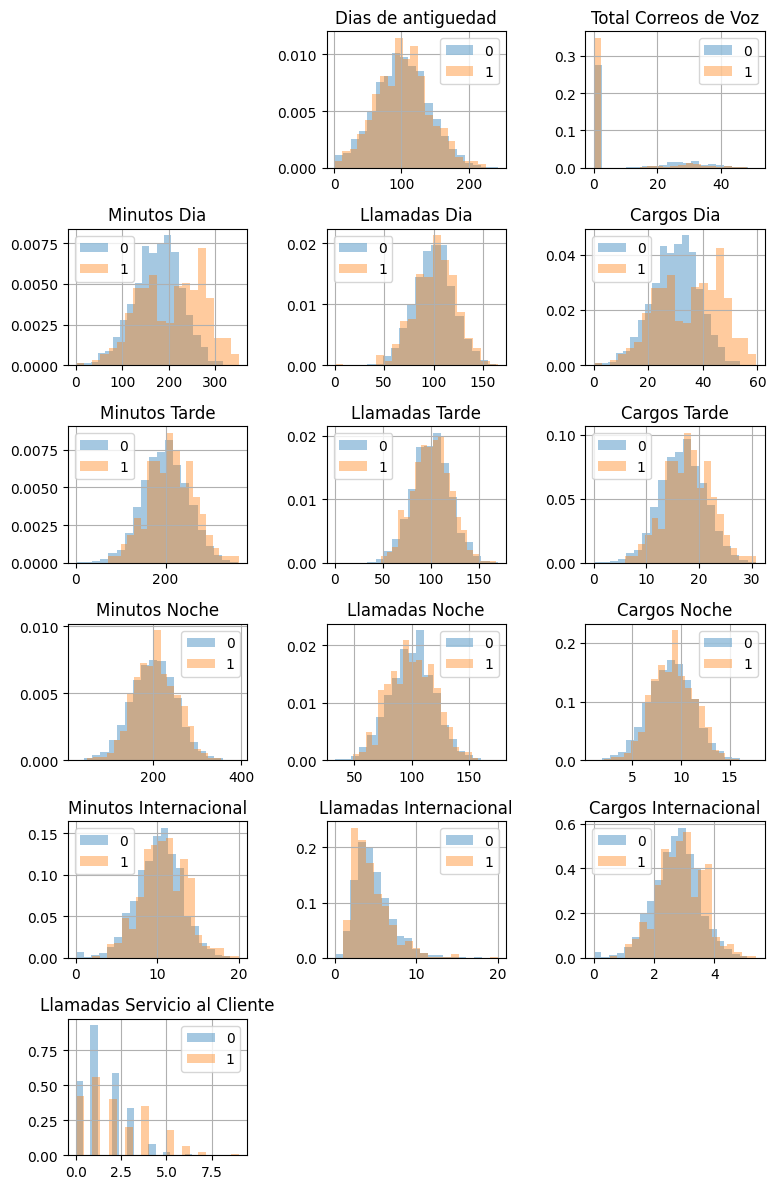

In [22]:
numericas_cols = df.select_dtypes('number').columns

fig, subplot = plt.subplots(nrows=6, ncols=3, figsize=(8, 12))
subplot= subplot.flatten()  # facilita iterar por cada grafica

for i, column in enumerate(numericas_cols[:-1]):
    df.groupby('Abandono')[column].hist(alpha=0.4, bins=20, ax=subplot[i+1],
                                        density=True)    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
    subplot[i+1].set_title(column)
    subplot[i+1].legend(df['Abandono'].unique())

plt.tight_layout()
subplot[0].set_visible(False)
subplot[-1].set_visible(False)
subplot[-2].set_visible(False)
plt.show()

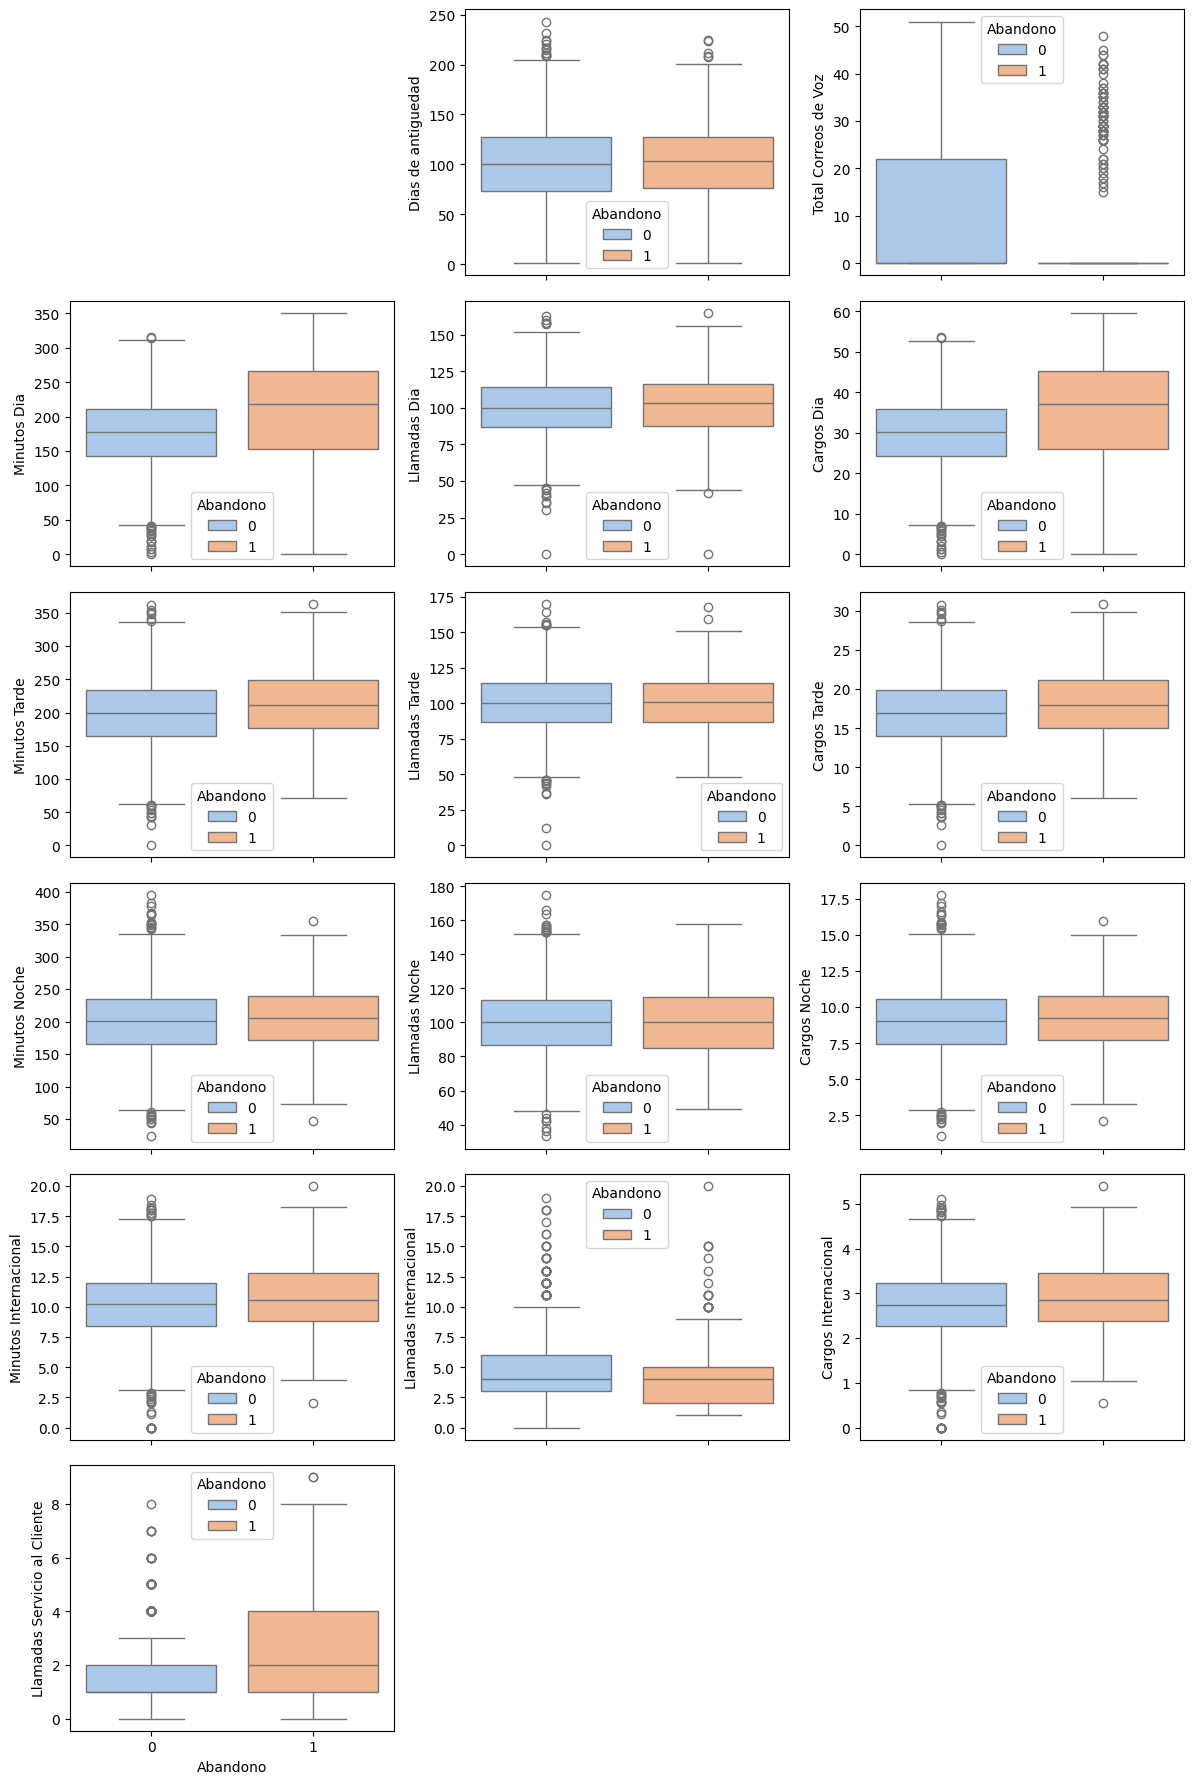

In [23]:
numericas_cols = df.select_dtypes('number').columns
fig, subplot = plt.subplots(nrows=6, ncols=3, figsize=(12, 18), sharex=True)
subplot= subplot.flatten()  # facilita iterar por cada grafica

for i, col in enumerate(numericas_cols[:-1]):
    sns.boxplot(y=col, x='Abandono', hue='Abandono', data=df,
                orient='v', palette='pastel', ax=subplot[i+1,])   # https://seaborn.pydata.org/generated/seaborn.boxplot.html
plt.tight_layout()
subplot[0].set_visible(False)
subplot[-1].set_visible(False)
subplot[-2].set_visible(False)
plt.show()

In [24]:
# Revisamos las categorias de las variables categoricas

for col in df.select_dtypes(object).columns:
    print(pd.crosstab(df[col],
                      df['Abandono'],
                      normalize='index'
                      ).round(2).sort_values(by=1,  ascending=False),
          end='\n\n')

Abandono     0     1
Estado              
CA        0.74  0.26
NJ        0.74  0.26
TX        0.75  0.25
MD        0.76  0.24
SC        0.77  0.23
MI        0.78  0.22
MS        0.78  0.22
ME        0.79  0.21
MT        0.79  0.21
WA        0.79  0.21
NV        0.79  0.21
AR        0.80  0.20
KS        0.81  0.19
MN        0.82  0.18
NY        0.82  0.18
PA        0.82  0.18
MA        0.83  0.17
CT        0.84  0.16
NH        0.84  0.16
NC        0.84  0.16
OK        0.85  0.15
GA        0.85  0.15
DE        0.85  0.15
CO        0.86  0.14
UT        0.86  0.14
OR        0.86  0.14
KY        0.86  0.14
SD        0.87  0.13
IN        0.87  0.13
FL        0.87  0.13
OH        0.87  0.13
ID        0.88  0.12
WY        0.88  0.12
VT        0.89  0.11
MO        0.89  0.11
ND        0.90  0.10
NM        0.90  0.10
AL        0.90  0.10
TN        0.91  0.09
WV        0.91  0.09
DC        0.91  0.09
IL        0.91  0.09
RI        0.91  0.09
WI        0.91  0.09
LA        0.92  0.08
NE        0.9

## 2. Preprocesamiento


### Binarización de variables

In [25]:
categoricas_cols = df.select_dtypes(object).columns
categoricas_cols

Index(['Estado', 'Codigo Postal', 'Plan Internacional', 'Plan Correo de voz'], dtype='object')

In [26]:
df[categoricas_cols].nunique()

,0
Estado,51
Codigo Postal,3
Plan Internacional,2
Plan Correo de voz,2


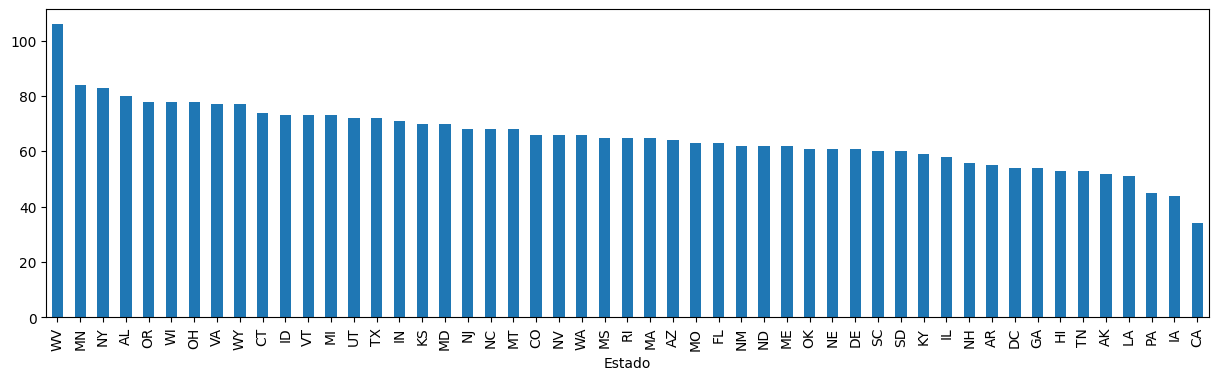

In [27]:
# ¿Podemos reducir el número de categorías en la columna 'Estado'?
# ¿Qué tan importante es cada una de las categorías de la columna 'Estado'?

df['Estado'].value_counts().plot(kind='bar',figsize=(15,4))
plt.show()

In [28]:
# Transformamos en númericas las columnas 'International plan' y 'Voice mail plan'

si_no_cols = [col for col in df.columns if ('Si' and 'No') in df[col].unique() and df[col].nunique()==2]
print(si_no_cols)
for col in si_no_cols:
    df[col] = np.where(df[col]=='Si', 1 ,0)

['Plan Internacional', 'Plan Correo de voz']


In [29]:
df.select_dtypes(object)

,Estado,Codigo Postal
0,KS,415
1,OH,415
2,NJ,415
3,OH,408
4,OK,415
...,...,...
3328,WI,415
3329,AL,408
3330,VT,415
3331,WV,415


In [35]:
# Utilizamos one-hot encoding para convertir variables categoricos a binarias (con ceros y unos)

df = pd.get_dummies(df)
df.head()

print(f'Columnas resultantes {df.shape[1]} \n')
for col in df.columns:
    print(col)

Columnas resultantes 72 

Dias de antiguedad
Plan Internacional
Plan Correo de voz
Total Correos de Voz
Minutos Dia
Llamadas Dia
Cargos Dia
Minutos Tarde
Llamadas Tarde
Cargos Tarde
Minutos Noche
Llamadas Noche
Cargos Noche
Minutos Internacional
Llamadas Internacional
Cargos Internacional
Llamadas Servicio al Cliente
Abandono
Estado_AK
Estado_AL
Estado_AR
Estado_AZ
Estado_CA
Estado_CO
Estado_CT
Estado_DC
Estado_DE
Estado_FL
Estado_GA
Estado_HI
Estado_IA
Estado_ID
Estado_IL
Estado_IN
Estado_KS
Estado_KY
Estado_LA
Estado_MA
Estado_MD
Estado_ME
Estado_MI
Estado_MN
Estado_MO
Estado_MS
Estado_MT
Estado_NC
Estado_ND
Estado_NE
Estado_NH
Estado_NJ
Estado_NM
Estado_NV
Estado_NY
Estado_OH
Estado_OK
Estado_OR
Estado_PA
Estado_RI
Estado_SC
Estado_SD
Estado_TN
Estado_TX
Estado_UT
Estado_VA
Estado_VT
Estado_WA
Estado_WI
Estado_WV
Estado_WY
Codigo Postal_408
Codigo Postal_415
Codigo Postal_510


In [36]:
#Llevar columna de clase (Abandono) hasta la última posición

df = df[[c for c in df if c != 'Abandono'] + ['Abandono']]

df.head()

,Dias de antiguedad,Plan Internacional,Plan Correo de voz,Total Correos de Voz,Minutos Dia,Llamadas Dia,Cargos Dia,Minutos Tarde,Llamadas Tarde,Cargos Tarde,...,Estado_VA,Estado_VT,Estado_WA,Estado_WI,Estado_WV,Estado_WY,Codigo Postal_408,Codigo Postal_415,Codigo Postal_510,Abandono
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,False,False,False,False,False,False,False,True,False,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,False,False,False,False,False,False,False,True,False,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,False,False,False,False,False,False,False,True,False,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,False,False,False,False,False,False,True,False,False,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,False,False,False,False,False,False,False,True,False,0


# Árbol de Decisión

## Creación de subconjuntos de entrenamiento y prueba

In [37]:
#Separar las etiquetas del conjunto de datos

y = df['Abandono']
X = df.drop('Abandono', axis=1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=8)

# ¿Cómo son los conjuntos de entrenamiento y prueba?
print("TRAINING SET")
print("X: ", X_train.shape)
print("y: ", y_train.shape)
print('Clientes que cancelan:{:7.3f}%'.format(y_train.mean()*100),'\n')

print("TEST SET")
print("X: ", X_test.shape)
print("y: ", y_test.shape)
print('Clientes que cancelan:{:7.3f}%'.format(y_test.mean()*100))


TRAINING SET
X:  (2666, 71)
y:  (2666,)
Clientes que cancelan: 14.479% 

TEST SET
X:  (667, 71)
y:  (667,)
Clientes que cancelan: 14.543%


## Entrenamiento y prueba del modelo

In [39]:
profundidad = None

# Entrenamiento del modelo.
clasificador = DecisionTreeClassifier(max_depth=profundidad,
                                      criterion="entropy",
                                      random_state=0)
clasificador.fit(X_train, y_train)
print("La profundida del árbol es: {}".format(clasificador.get_depth()))


# Predicción y evaluación sobre el conjunto de entrenamiento.
y_pred_train = clasificador.predict(X_train)
exactitud_train = accuracy_score(y_train, y_pred_train)*100
print("Exactitud conjunto de entrenamiento: {:4.2f}%".format(exactitud_train))


# Predicción y evaluación sobre el conjunto de prueba.
y_pred_test = clasificador.predict(X_test)
exactitud_test = accuracy_score(y_test, y_pred_test)*100
print("Exactitud conjunto de prueba: {:4.2f}%".format(exactitud_test),'\n')


La profundida del árbol es: 27
Exactitud conjunto de entrenamiento: 100.00%
Exactitud conjunto de prueba: 92.80% 



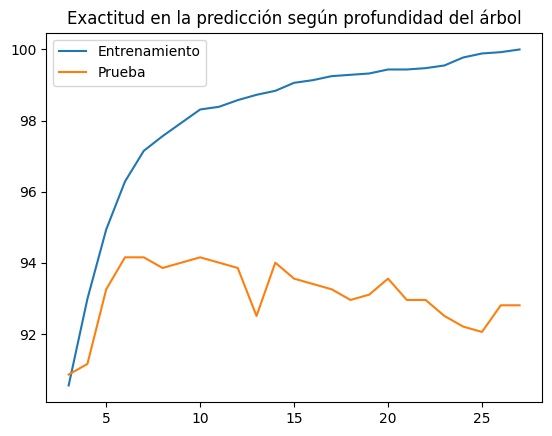

In [40]:
# Entrenamiento y prueba del modelo con distintos niveles de profunidad

clf = {}
y_pred_train = {}
y_pred_test = {}
exactitud_train={}
exactitud_test = {}

for p in range(3,28):
    # Entrenamiento del modelo
    clf[p] = DecisionTreeClassifier(max_depth = p,
                               criterion = "entropy",
                               random_state = 0).fit(X_train, y_train)

    # Predicción y evaluación sobre el conjunto de entrenamiento
    y_pred_train[p] = clf[p].predict(X_train)
    exactitud_train[p] = accuracy_score(y_train, y_pred_train[p])*100

    # Predicción y evaluación sobre el conjunto de prueba
    y_pred_test[p] = clf[p].predict(X_test)
    exactitud_test[p] = accuracy_score(y_test, y_pred_test[p])*100

exactitud_df = pd.DataFrame( {'Entrenamiento':exactitud_train,
                           'Prueba': exactitud_test})

exactitud_df.plot.line(
    title ='Exactitud en la predicción según profundidad del árbol')
plt.show()

In [41]:
exactitud_df

,Entrenamiento,Prueba
3,90.547637,90.854573
4,92.985746,91.154423
5,94.936234,93.253373
6,96.286572,94.152924
7,97.149287,94.152924
8,97.561890,93.853073
9,97.936984,94.002999
10,98.312078,94.152924
11,98.387097,94.002999
12,98.574644,93.853073


In [42]:
profundidad_optima = exactitud_df['Prueba'].idxmax()
profundidad_optima

np.int64(6)

In [43]:
model = clf[profundidad_optima]

## Visualización del árbol de decisión

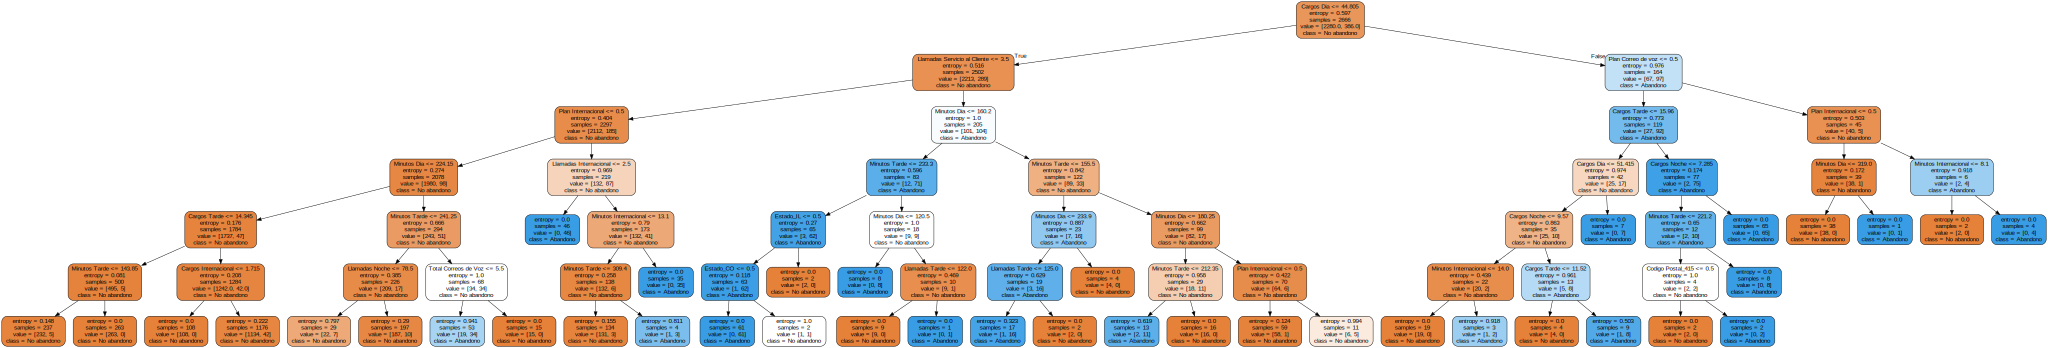

In [50]:
# Exportar el árbol como archivo.dot

dot_data = export_graphviz(clf[6], feature_names=X.columns,
                           class_names=['No abandono','Abandono'],
                           max_depth = 6,
                           rounded = True,
                           filled = True,
                           )

graph =  graphviz.Source(dot_data, format='png')

graph.render('arbol_decision')              # guarda el archivo .dot y la gráfica png
graph

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


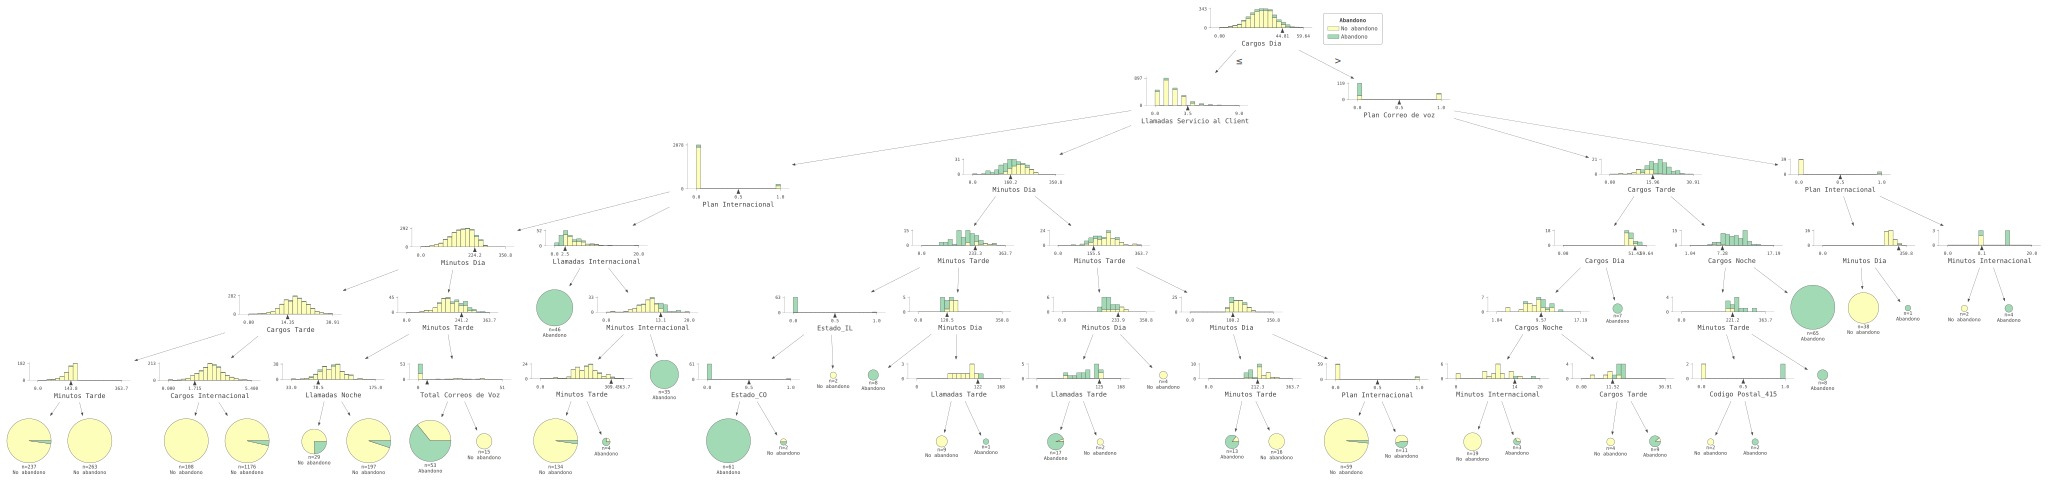

In [51]:
viz_tree = dtreeviz.model(model, X_train, y_train,
                target_name='Abandono',
                feature_names=X_train.columns,
                class_names=['No abandono','Abandono'])

v = viz_tree.view(fontname="monospace", scale=1.2)     # render para guardar en formato
v.save("viz_tree.svg")
v

## Importancia de cada variable de acuerdo al modelo

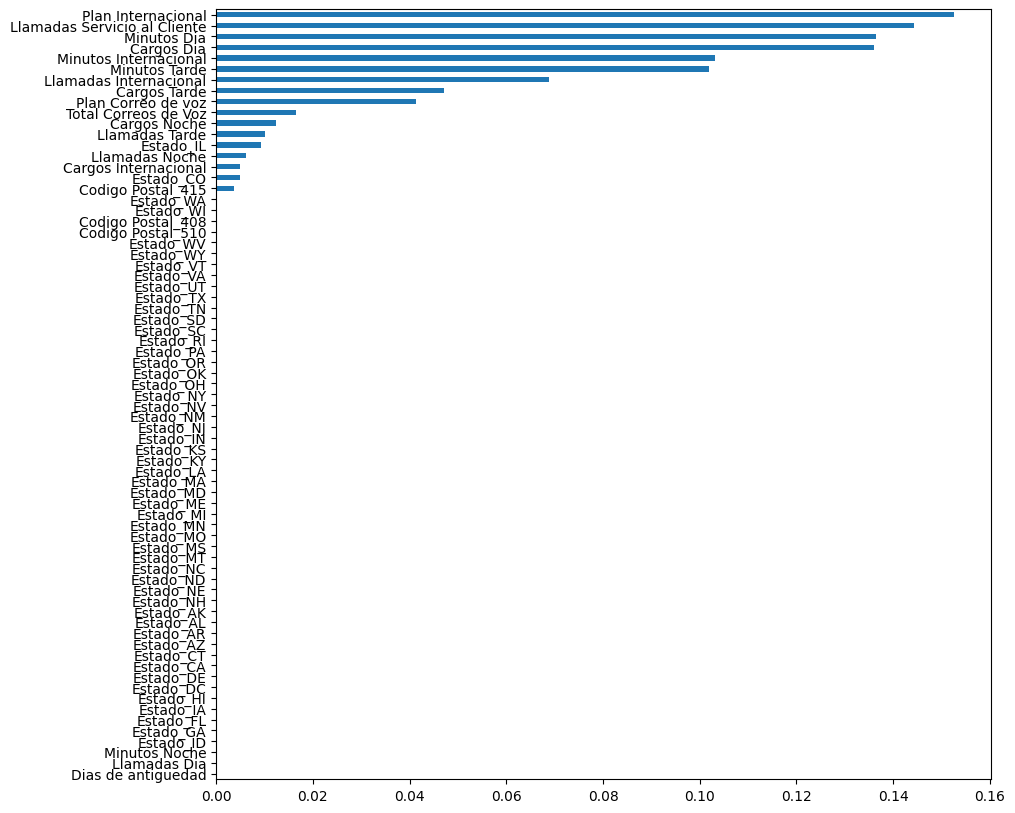

In [52]:
importancia = pd.Series(model.feature_importances_,
                    index=X.columns.values)

importancia.sort_values().plot(kind = 'barh',figsize=(10, 10))
plt.show()

## Matriz de confusión y minimización de errores "graves"

**Matriz de confusión**

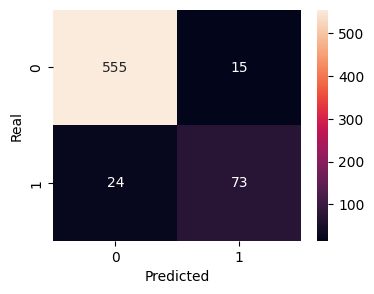

In [53]:
#Matriz de confusión
data = {'y_Real':y_test, 'y_Prediccion':model.predict(X_test)}

df = pd.DataFrame(data)
confusion_matrix = pd.crosstab(df['y_Real'], df['y_Prediccion'],
                               rownames=['Real'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

In [54]:
model.predict(X_test)[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [59]:
pd.DataFrame(model.predict_proba(X_test), columns=['No Abandono', 'Abandono']).sort_values('Abandono')

,No Abandono,Abandono
665,1.0,0.0
1,1.0,0.0
664,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
216,0.0,1.0
38,0.0,1.0
634,0.0,1.0
29,0.0,1.0


In [60]:
umbral = 0.15 # por arriba del cual se clasificaría como clase 1
prediccion_test = np.where( model.predict_proba(X_test)[:, 1] > umbral, 'Abandono', 'No Abandono')
prediccion_test[0:20]

array(['No Abandono', 'No Abandono', 'No Abandono', 'No Abandono',
       'No Abandono', 'No Abandono', 'No Abandono', 'No Abandono',
       'Abandono', 'No Abandono', 'No Abandono', 'No Abandono',
       'No Abandono', 'No Abandono', 'No Abandono', 'Abandono',
       'No Abandono', 'No Abandono', 'No Abandono', 'No Abandono'],
      dtype='<U11')

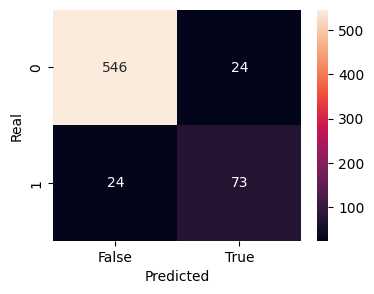

In [61]:
umbral = 0.12 # por arriba del cual se clasificaría como clase 1
prediccion_test = np.where( model.predict_proba(X_test)[:, 1] > umbral, True, False)
data = {'y_Real':  y_test,
        'y_Prediccion': prediccion_test
        }

evaluacion_df = pd.DataFrame(data)
confusion_matrix = pd.crosstab(evaluacion_df['y_Real'], evaluacion_df['y_Prediccion'], rownames=['Real'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

# Bosque Aleatorio

## Entrenamiento y prueba


In [ ]:
clf_rf = RandomForestClassifier(n_estimators=1000,  random_state =0,
                                criterion='entropy').fit(X_train, y_train)


y_pred = clf_rf.predict(X_test)
print("Exactitud del modelo Bosque Aleatorio en el conjunto de prueba: {:4.2f}%".format(accuracy_score(y_test, y_pred)*100))


Exactitud del modelo Bosque Aleatorio en el conjunto de prueba: 92.80%


<Axes: >

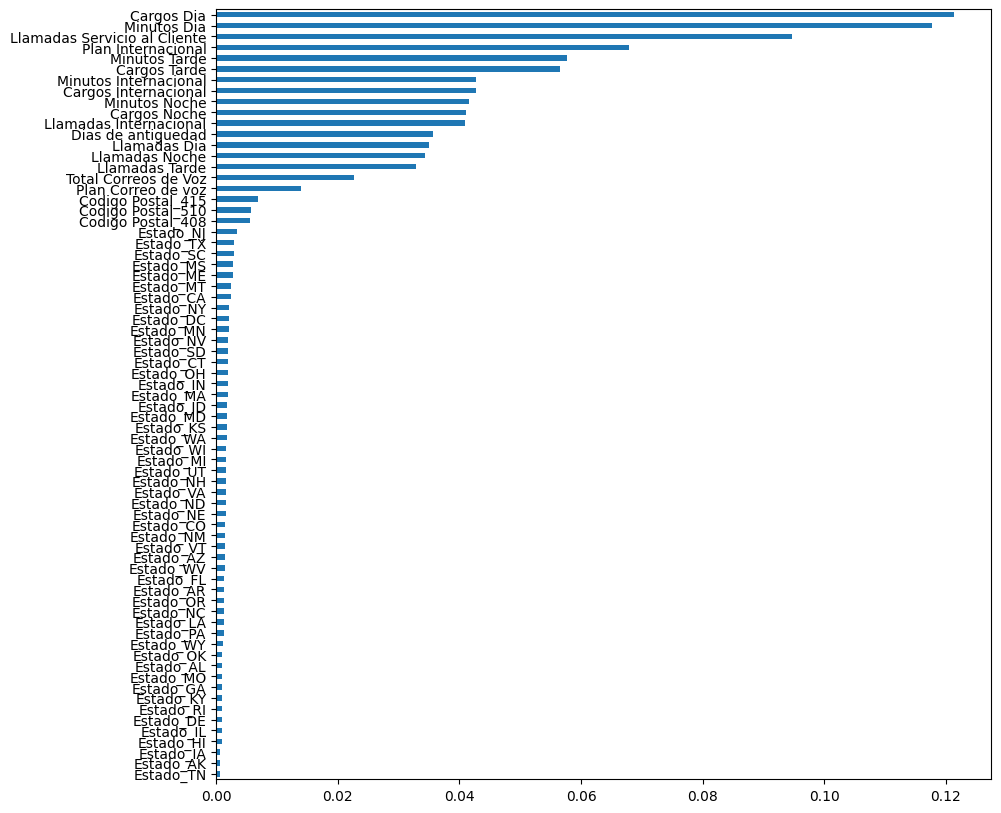

In [ ]:
importances = clf_rf.feature_importances_
weights = pd.Series(importances,
                    index=X.columns.values)
weights.sort_values().plot(kind = 'barh',figsize=(10, 10))

In [ ]:
clf_rf.predict_proba(X_test)

array([[0.97 , 0.03 ],
       [0.481, 0.519],
       [0.958, 0.042],
       ...,
       [0.981, 0.019],
       [0.976, 0.024],
       [0.96 , 0.04 ]])